In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# membagi 2 data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


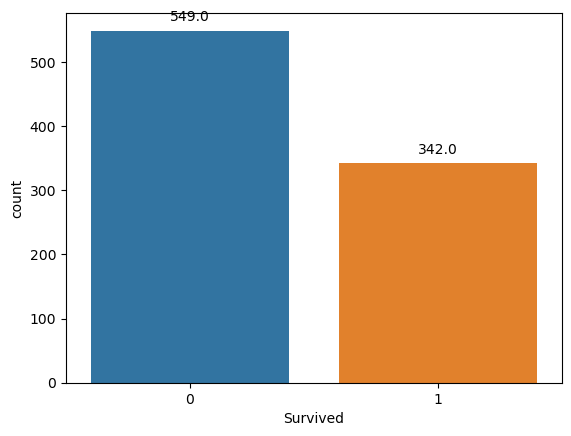

In [7]:
ax = sns.countplot(x='Survived',data=df_train);
# Menambahkan teks di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

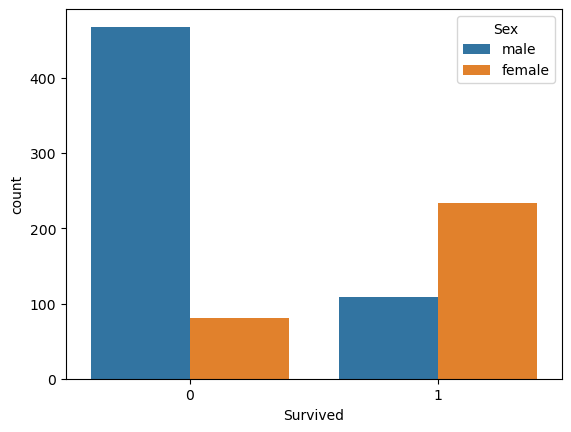

In [8]:
sns.countplot(x='Survived',data=df_train,hue='Sex');

In [9]:
# mengecek missing value data train
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# mengecek missing value data test
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Kita bisa melihat bahwa di dalam data tersebut masih terdapat beberapa nilai yang tidak terisi, oleh sebab itu kita isi kolom yang kosong, 
untuk kolom numerik saya isi dengan nilai median, sedangkan untuk kolom kategorik biasa saya isi dengan unknown. Untuk kolom lain yang tidak penting saya drop.

In [11]:
# mengisi missing value
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
# df_train['Cabin'] = df_train.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))

In [12]:
# drop kolom
dropKolom = ['Name','Ticket','Cabin','Embarked']
df_train.drop(dropKolom,axis=1,inplace=True)
df_test.drop(dropKolom,axis=1,inplace=True)

In [13]:
# menghapus baris missing value fare data test
df_test.dropna(inplace=True)

In [14]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [15]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    object 
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 26.1+ KB


In [18]:
# mendeteksi data duplikat
df_train.duplicated().sum()

0

In [19]:
# mengubah sex to numerical
df_train['Sex'] = pd.get_dummies(df_train['Sex'], drop_first=True)
df_train['Sex'] = df_train['Sex'].astype(int)

# mengubah sex to numerical
df_test['Sex'] = pd.get_dummies(df_test['Sex'], drop_first=True)
df_test['Sex'] = df_test['Sex'].astype(int)

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [21]:
# standarasisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standarisasi kolom numerik pada data train
df_train['Pclass'] = StandardScaler().fit_transform(df_train['Pclass'].values.reshape(len(df_train), 1))
df_train['Age'] = StandardScaler().fit_transform(df_train['Age'].values.reshape(len(df_train), 1))
df_train['SibSp'] = StandardScaler().fit_transform(df_train['SibSp'].values.reshape(len(df_train), 1))
df_train['Parch'] = StandardScaler().fit_transform(df_train['Parch'].values.reshape(len(df_train), 1))
df_train['Fare'] = StandardScaler().fit_transform(df_train['Fare'].values.reshape(len(df_train), 1))

# Standarisasi kolom numerik pada data test
df_test['Pclass'] = StandardScaler().fit_transform(df_test['Pclass'].values.reshape(len(df_test), 1))
df_test['Age'] = StandardScaler().fit_transform(df_test['Age'].values.reshape(len(df_test), 1))
df_test['SibSp'] = StandardScaler().fit_transform(df_test['SibSp'].values.reshape(len(df_test), 1))
df_test['Parch'] = StandardScaler().fit_transform(df_test['Parch'].values.reshape(len(df_test), 1))
df_test['Fare'] = StandardScaler().fit_transform(df_test['Fare'].values.reshape(len(df_test), 1))

In [22]:
# membagi variabel train
x_train = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_train = df_train['Survived']

# membagi variabel test
x_test = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,0.827377,1,-0.565736,0.432793,-0.473674,-0.502445
1,2,1,-1.566107,0,0.663861,0.432793,-0.473674,0.786845
2,3,1,0.827377,0,-0.258337,-0.474545,-0.473674,-0.488854
3,4,1,-1.566107,0,0.433312,0.432793,-0.473674,0.420730
4,5,0,0.827377,1,0.433312,-0.474545,-0.473674,-0.486337


In [24]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
# Inisialisasi RFE dengan model wrapper (Logistic Regression) dan jumlah fitur yang ingin dipilih
rfe = RFE(estimator=lr, n_features_to_select=5)

# Latih wrapper model (Logistic Regression) dengan RFE
rfe.fit(x_train, y_train)

# Menampilkan fitur yang terpilih
selected_features = [i for i, value in enumerate(rfe.support_) if value]
print("Selected features indices:", selected_features)

# Menampilkan ranking fitur
print("Feature ranking:", rfe.ranking_)

Selected features indices: [0, 1, 2, 3, 5]
Feature ranking: [1 1 1 1 2 1]


In [27]:
# feature importance dari nilai koefisien
col = ['Pclass, Sex, Age, SibSp, Parch, Fare']
koef = lr.coef_
for c,k in zip(col,koef):
    print(f'{c}:{k}')

Pclass, Sex, Age, SibSp, Parch, Fare:[-0.88240616 -2.65118077 -0.49771812 -0.36876334 -0.07693613  0.14520431]


Arah positif / negatif menunjukkan hubungan antara fitur dengan variabel dependen. 
Sementara nilai magnitudo koefisien mengindikasi seberapa besar dampaknya.
Semakin besar magnitudo, semakin besar kontribusi fitur terhadap prediksi model.

In [28]:
# membagi variabel train
x= df_train[['Pclass','Sex','Age','SibSp','Fare']]
y = df_train['Survived']
x_test = df_test[['Pclass','Sex','Age','SibSp','Fare']]

In [29]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [30]:
#uji akurasi model - validation
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 79.296% (5.426%)


In [31]:
from sklearn.model_selection import cross_val_score

# KNN
from sklearn.neighbors import KNeighborsClassifier

# mencari k terbaik
k_values = [i + 1 for i in range(20)]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    accuracies.append((results.mean()*100.0, results.std()*100.0))
    print("k =", k)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

best_k_index = accuracies.index(max(accuracies))
best_k = k_values[best_k_index]
best_accuracy = max(accuracies)

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

k = 1
Accuracy: 75.123% (4.557%)
k = 2
Accuracy: 75.922% (3.746%)
k = 3
Accuracy: 76.569% (4.596%)
k = 4
Accuracy: 78.653% (4.063%)
k = 5
Accuracy: 78.984% (4.563%)
k = 6
Accuracy: 79.936% (5.052%)
k = 7
Accuracy: 79.460% (4.892%)
k = 8
Accuracy: 79.764% (4.776%)
k = 9
Accuracy: 79.767% (4.244%)
k = 10
Accuracy: 79.439% (4.711%)
k = 11
Accuracy: 80.412% (4.617%)
k = 12
Accuracy: 79.611% (5.115%)
k = 13
Accuracy: 80.573% (4.544%)
k = 14
Accuracy: 80.251% (3.637%)
k = 15
Accuracy: 81.057% (4.196%)
k = 16
Accuracy: 80.097% (4.732%)
k = 17
Accuracy: 79.777% (4.885%)
k = 18
Accuracy: 79.775% (4.508%)
k = 19
Accuracy: 80.092% (4.524%)
k = 20
Accuracy: 79.613% (4.891%)
Best k: 15
Best Accuracy: (81.05734767025089, 4.195818003684924)


In [32]:
# melakukan prediksi data test logisticRegression
lr.fit(X_train,y_train)
predictLR = lr.predict(X_test)

# melakukan prediksi data test KNN
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
predictKNN = knn.predict(X_test)

In [33]:
#confusion matrix LR
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictLR))
print(classification_report(y_test,predictLR))
pd.crosstab(y_test,predictLR,colnames=['Predicted'],margins=True)

[[136  21]
 [ 32  79]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



Predicted,0,1,All
Survived,,,
0,136,21,157
1,32,79,111
All,168,100,268


In [34]:
#confusion matrix KNN
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictKNN))
print(classification_report(y_test,predictKNN))
pd.crosstab(y_test,predictKNN,colnames=['Predicted'],margins=True)

[[141  16]
 [ 38  73]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.82      0.66      0.73       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268



Predicted,0,1,All
Survived,,,
0,141,16,157
1,38,73,111
All,179,89,268


In [35]:
# melakukan prediksi data test logisticRegression
lr.fit(X_train,y_train)
predictLR = lr.predict(x_test)

In [36]:
predict_df = pd.DataFrame(df_test['PassengerId'])
predict_df['Survived'] = predictLR
predict_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
# melakukan prediksi data test KNN
predictKNN = knn.predict(x_test)

In [38]:
predict_df = pd.DataFrame(df_test['PassengerId'])
predict_df['Survived'] = predictKNN
predict_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Reference
https://youtu.be/fATVVQfFyU0?si=nYWT4P7vp1uXyom0

https://youtu.be/Lgp14y9-U74?si=C3e2uaYEyrlKkMOP

https://medium.com/@rismitawahyu/comparing-analysislogistic-regression-k-nearest-neighbors-k-nn-and-support-vector-machine-svm-67a5d0cc4091